In [1]:
from mne_bids import BIDSPath
from mne import io
import mne
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\pthoe\miniforge3\envs\gen\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\pthoe\miniforge3\envs\gen\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\pthoe\miniforge3\envs\gen\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\pthoe\miniforge3\envs\gen\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  Fil

AttributeError: _ARRAY_API not found

# Load raw EEG data from sub1 and sub3 (ceremony1) for alignment

In [2]:
BIDS_ROOT = ".."

In [3]:
def load_eeg(sub, ceremony, roo):
    paths = BIDSPath(
        subject=sub,
        session=ceremony,
        task="psilo",
        datatype="eeg",
        root="..",
    ).match()

    raws = []
    for path in paths:
        raw = io.read_raw(path, preload=True)
        # set annotations
        events = mne.find_events(raw, "Trigger")
        raw.set_annotations(mne.annotations_from_events(events, raw.info["sfreq"]))
        raws.append(raw)
    return paths, raws


sub1_paths, sub1_raw = load_eeg("01", "ceremony1", BIDS_ROOT)
sub3_paths, sub3_raw = load_eeg("03", "ceremony1", BIDS_ROOT)

Extracting EDF parameters from c:\Users\pthoe\projects\mexico\structure\bidsified\sub-01\ses-ceremony1\eeg\sub-01_ses-ceremony1_task-psilo_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5612999  =      0.000 ... 18709.997 secs...
Trigger channel Trigger has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
189 events found on stim channel Trigger
Event IDs: [1 2 3 4 5 6 7 8 9]
Extracting EDF parameters from c:\Users\pthoe\projects\mexico\structure\bidsified\sub-03\ses-ceremony1\eeg\sub-03_ses-ceremony1_task-psilo_split-01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157799  =      0.000 ...   525.997 secs...
Trigger channel Trigger has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset 

In [4]:
# print measurement data and duration for each file from sub1
print("subject 1")
for p, r in zip(sub1_paths, sub1_raw):
    duration = r.times[-1] - r.times[0]
    print(
        str(p).split("/")[-1],  # filename
        r.info["meas_date"],  # measurement date
        f"{int(duration//3600):02d}:{int((duration%3600)//60):02d}:{int(duration%60):02d}",  # duration in HH:MM:SS
        sep="\t",
    )

# print measurement data and duration for each file from sub3
print("\nsubject 3")
for p, r in zip(sub3_paths, sub3_raw):
    duration = r.times[-1] - r.times[0]
    print(
        str(p).split("/")[-1],  # filename
        r.info["meas_date"],  # measurement date
        f"{int(duration//3600):02d}:{int((duration%3600)//60):02d}:{int(duration%60):02d}",  # duration in HH:MM:SS
        sep="\t",
    )

subject 1
sub-01_ses-ceremony1_task-psilo_eeg.edf	2024-11-07 21:54:13+00:00	05:11:49

subject 3
sub-03_ses-ceremony1_task-psilo_split-01_eeg.edf	2024-11-08 01:54:23+00:00	00:08:45
sub-03_ses-ceremony1_task-psilo_split-02_eeg.edf	2024-11-07 22:26:29+00:00	00:58:29
sub-03_ses-ceremony1_task-psilo_split-03_eeg.edf	2024-11-07 23:41:25+00:00	00:07:01
sub-03_ses-ceremony1_task-psilo_split-04_eeg.edf	2024-11-07 23:52:23+00:00	00:12:43
sub-03_ses-ceremony1_task-psilo_split-05_eeg.edf	2024-11-08 00:13:58+00:00	00:02:53
sub-03_ses-ceremony1_task-psilo_split-06_eeg.edf	2024-11-08 00:23:05+00:00	00:26:33
sub-03_ses-ceremony1_task-psilo_split-07_eeg.edf	2024-11-08 00:59:44+00:00	00:25:33
sub-03_ses-ceremony1_task-psilo_split-08_eeg.edf	2024-11-08 01:35:24+00:00	00:15:11
sub-03_ses-ceremony1_task-psilo_split-09_eeg.edf	2024-11-08 01:56:28+00:00	00:41:17


# Display aligned timestamps of triggers for both subjects

In [5]:
r = sub1_raw[0]
onset_times = (r.annotations.onset[r.annotations.description == "1"] / 60).tolist()
meas_date = r.info["meas_date"]

# Offset by the measurement date
offset_times = [meas_date + pd.to_timedelta(time, unit="m") for time in onset_times]

formatted_times = [f"{time.strftime('%Y-%m-%d %H:%M:%S')}" for time in offset_times]
{i: t for i, t in enumerate(formatted_times)}

{0: '2024-11-07 21:54:13',
 1: '2024-11-07 21:54:15',
 2: '2024-11-07 21:54:15',
 3: '2024-11-07 22:26:32',
 4: '2024-11-07 22:26:43',
 5: '2024-11-07 22:26:44',
 6: '2024-11-07 22:26:45',
 7: '2024-11-07 22:26:45',
 8: '2024-11-07 23:40:12',
 9: '2024-11-07 23:51:08',
 10: '2024-11-07 23:51:48',
 11: '2024-11-07 23:51:49',
 12: '2024-11-07 23:52:51',
 13: '2024-11-08 00:11:54',
 14: '2024-11-08 00:21:03',
 15: '2024-11-08 00:57:25',
 16: '2024-11-08 01:33:03',
 17: '2024-11-08 01:54:28'}

In [6]:
for r in sub3_raw:
    onset_times = (r.annotations.onset[r.annotations.description == "1"] / 60).tolist()
    meas_date = r.info["meas_date"]

    # Offset by the measurement date
    offset_times = [meas_date + pd.to_timedelta(time, unit="m") for time in onset_times]

    formatted_times = [f"{time.strftime('%Y-%m-%d %H:%M:%S')}" for time in offset_times]
    print(formatted_times)

['2024-11-08 01:54:23', '2024-11-08 01:54:24', '2024-11-08 01:54:25', '2024-11-08 01:54:25', '2024-11-08 01:55:49', '2024-11-08 01:55:50', '2024-11-08 01:55:50', '2024-11-08 01:55:51', '2024-11-08 01:55:52']
['2024-11-07 22:26:38']
['2024-11-07 23:41:36']
['2024-11-07 23:53:42']
['2024-11-08 00:14:03']
['2024-11-08 00:23:10']
['2024-11-08 00:59:53']
['2024-11-08 01:35:31']
['2024-11-08 01:56:53']


# Select the synchronization triggers to keep for alignment

In [7]:
# sub1_indices = [[0, 3, 8, 12, 13, 14, 15, 16, 17]] # keep
sub1_indices = [[1, 2, 4, 5, 6, 7, 9, 10, 11]]  # discard
# sub3_indices = [[0], [0], [0], [0], [0], [0], [0], [0], [0]] # keep
sub3_indices = [[1, 2, 3, 4, 5, 6, 7, 8], [], [], [], [], [], [], [], []]  # discard

In [8]:
# discard unused synchronization triggers from sub1
sub1_raw_aligned = sub1_raw[0].copy()
annot1 = sub1_raw_aligned.annotations
keep_idxs = np.where(annot1.description == "1")[0][sub1_indices[0]]
mask = np.zeros(len(annot1), dtype=bool)
mask[keep_idxs] = True
sub1_raw_aligned.set_annotations(annot1[~mask])

print("trigger times:")
print(
    sub1_raw_aligned.annotations.onset[
        sub1_raw_aligned.annotations.description == "1"
    ].tolist()
)

trigger times:
[0.7, 1939.473333, 6359.103333, 7118.21, 8261.49, 8810.276667, 10992.626667, 13130.836667, 14415.593333]


In [9]:
# discard unused synchronization triggers for sub3
sub3_raw_aligned = sub3_raw[0].copy()
annot1 = sub3_raw_aligned.annotations
keep_idxs = np.where(annot1.description == "1")[0][sub3_indices[0]]
mask = np.zeros(len(annot1), dtype=bool)
mask[keep_idxs] = True
sub3_raw_aligned.set_annotations(annot1[~mask])
sub3_raw_aligned = [sub3_raw_aligned] + sub3_raw[1:]

print("trigger times:")
for r in sub3_raw_aligned:
    print(r.annotations.onset[r.annotations.description == "1"].tolist())

trigger times:
[0.7]
[9.553333]
[11.306667]
[79.35]
[5.856667]
[5.476667]
[9.253333]
[7.563333]
[25.746667]


# Calculate the duration of missing data (gap) between sub3 recordings

In [10]:
annot1 = sub1_raw_aligned.annotations
times1 = annot1.onset[annot1.description == "1"]
diffs = times1[1:] - times1[:-1]

duration_after_trigger3 = []
trigger_offsets = []
for i, r in enumerate(sub3_raw_aligned):
    annot3 = r.annotations
    time3 = annot3.onset[annot3.description == "1"]
    duration3 = r.times[-1] - r.times[0]
    duration_after_trigger3.append(duration3 - time3)
    trigger_offsets.append(time3.item())

gap_durations = (
    np.array(diffs) - np.array(duration_after_trigger3).squeeze()[:-1]
).tolist()

print("gap durations and trigger offsets:")
list(zip(gap_durations, trigger_offsets))

gap durations and trigger offsets:


[(1413.4766663333332, 0.7),
 (919.1866663333335, 9.553333),
 (348.41666733333335, 11.306667),
 (458.6333333333331, 79.35),
 (380.64666733333365, 5.856667),
 (593.8300003333336, 5.476667),
 (613.4666663333326, 9.253333),
 (380.3233323333345, 7.563333)]

# Align individual recordings of sub3 to sub1 recording

In [11]:
def concatenate_raws_with_offsets(raws, gap_durations, trigger_offsets):
    raws_with_gaps = []
    n_annotations = []
    for i, raw in enumerate(raws):
        raws_with_gaps.append(mne.io.RawArray(raw.get_data(), raw.info.copy()))

        annot = raw.annotations.copy()
        n_annotations.append(len(annot))
        raws_with_gaps[-1].set_annotations(annot)

        if i < len(raws) - 1:
            gap_samples = int(np.round(gap_durations[i] * raw.info["sfreq"])) - 1
            gap_data = np.full((raw.info["nchan"], gap_samples), np.nan)
            gap_info = raw.info.copy()
            gap_raw = mne.io.RawArray(gap_data, gap_info)
            raws_with_gaps.append(gap_raw)

    out = mne.concatenate_raws(raws_with_gaps)

    cumulative_offset = 0
    for i, n in enumerate(n_annotations):
        if i == 0:
            cumulative_offset += n + 4
            continue
        out.annotations.onset[cumulative_offset : cumulative_offset + n] -= np.cumsum(
            trigger_offsets[1:]
        )[i - 1]
        cumulative_offset += n + 4

    return out


sub3_concatenated = concatenate_raws_with_offsets(
    sub3_raw_aligned, gap_durations, trigger_offsets
)

# make sure the trigger timings are aligned between the two subjects
assert np.allclose(
    np.array(
        sub3_concatenated.annotations.onset[
            sub3_concatenated.annotations.description == "1"
        ]
    ),
    np.array(
        sub1_raw_aligned.annotations.onset[
            sub1_raw_aligned.annotations.description == "1"
        ]
    ),
)

Creating RawArray with float64 data, n_channels=30, n_times=157800
    Range : 0 ... 157799 =      0.000 ...   525.997 secs
Ready.
Creating RawArray with float64 data, n_channels=30, n_times=424042
    Range : 0 ... 424041 =      0.000 ...  1413.470 secs
Ready.
Creating RawArray with float64 data, n_channels=30, n_times=1053000
    Range : 0 ... 1052999 =      0.000 ...  3509.997 secs
Ready.
Creating RawArray with float64 data, n_channels=30, n_times=275755
    Range : 0 ... 275754 =      0.000 ...   919.180 secs
Ready.
Creating RawArray with float64 data, n_channels=30, n_times=126600
    Range : 0 ... 126599 =      0.000 ...   421.997 secs
Ready.
Creating RawArray with float64 data, n_channels=30, n_times=104524
    Range : 0 ... 104523 =      0.000 ...   348.410 secs
Ready.
Creating RawArray with float64 data, n_channels=30, n_times=229200
    Range : 0 ... 229199 =      0.000 ...   763.997 secs
Ready.
Creating RawArray with float64 data, n_channels=30, n_times=137589
    Range : 0 

# Plot the aligned data from both subjects

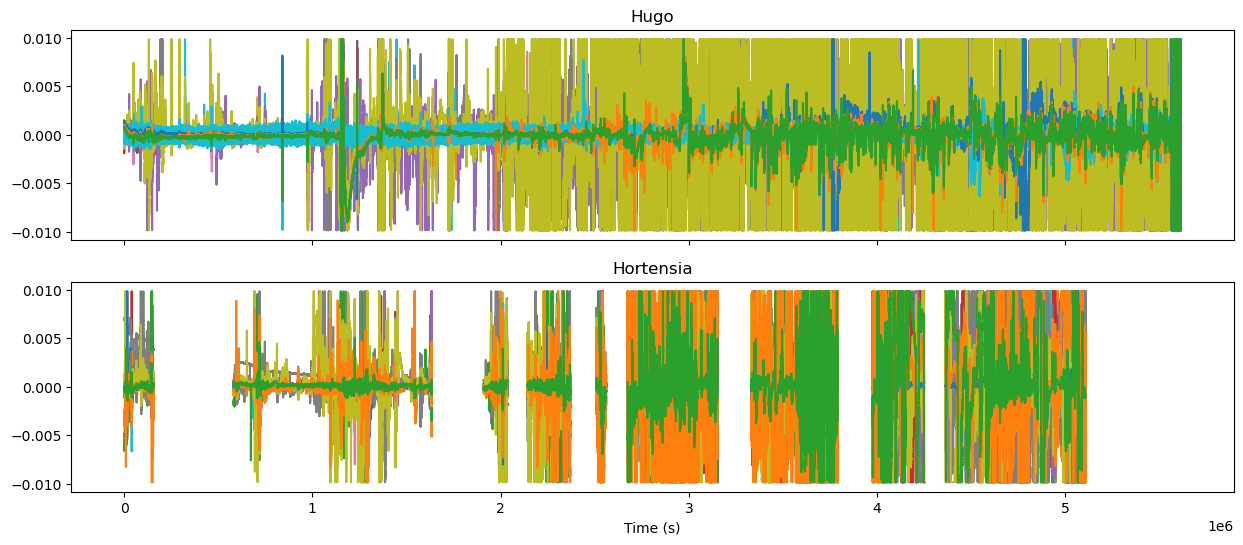

In [12]:
ch_idxs = np.where(
    list(map(lambda name: name.startswith("EEG"), sub1_raw_aligned.ch_names))
)[0]

_, axes = plt.subplots(2, 1, figsize=(15, 6), sharex=True)
axes[0].set_title("Hugo")
axes[0].plot(sub1_raw_aligned.get_data()[ch_idxs].T)
axes[1].set_title("Hortensia")
axes[1].plot(sub3_concatenated.get_data()[ch_idxs].T)
plt.xlabel("Time (s)")
plt.show()